In [1]:
import numpy as np
from scipy.optimize import linprog,minimize,linear_sum_assignment

## python求解整数规划
指派问题的求解

In [2]:
from scipy.optimize import linear_sum_assignment
import numpy as np
T=np.array([[25,29,31,42],[39,38,26,20],[34,27,28,40],[24,42,36,23]])
row_ind,col_ind=linear_sum_assignment(T)
print(row_ind)
print(col_ind)
print(T[row_ind,col_ind])
print(T[row_ind,col_ind].sum())

[0 1 2 3]
[0 2 1 3]
[25 26 27 23]
101


# 分支定界法

In [3]:
import math
from scipy.optimize import linprog
import sys


def integerPro(c, A, b, Aeq, beq, t=1.0E-8):
    res = linprog(c, A_ub=A, b_ub=b, A_eq=Aeq, b_eq=beq)
    bestVal = sys.maxsize  # 很大一个数
    bestX = res.x
    if not (type(res.x) is float or res.status != 0):
        bestVal = sum([x * y for x, y in zip(c, bestX)])
    if all(((x - math.floor(x)) <= t or (math.ceil(x) - x) <= t) for x in bestX):
        return bestVal, bestX
    else:
        ind = [i for i, x in enumerate(bestX) if (x - math.floor(x)) > t and (math.ceil(x) - x) > t][0]
        newCon1 = [0] * len(A[0])
        newCon2 = [0] * len(A[0])
        newCon1[ind] = -1
        newCon2[ind] = 1
        newA1 = A.copy()
        newA2 = A.copy()
        newA1.append(newCon1)
        newA2.append(newCon2)
        newB1 = b.copy()
        newB2 = b.copy()
        newB1.append(-math.ceil(bestX[ind]))
        newB2.append(math.floor(bestX[ind]))
        r1 = integerPro(c, newA1, newB1, Aeq, beq)
        r2 = integerPro(c, newA2, newB2, Aeq, beq)
        if r1[0] < r2[0]:
            return r1
        else:
            return r2


if __name__ == '__main__':

    c = [3, 4, 1]
    A = [[-1, -6, -2], [-2, 0, 0]]
    b = [-5, -3]
    Aeq = [[0, 0, 0]]
    beq = [0]
    print(integerPro(c, A, b, Aeq, beq))

(8.000000000001586, array([2.00000000e+00, 1.83247535e-13, 2.00000000e+00]))


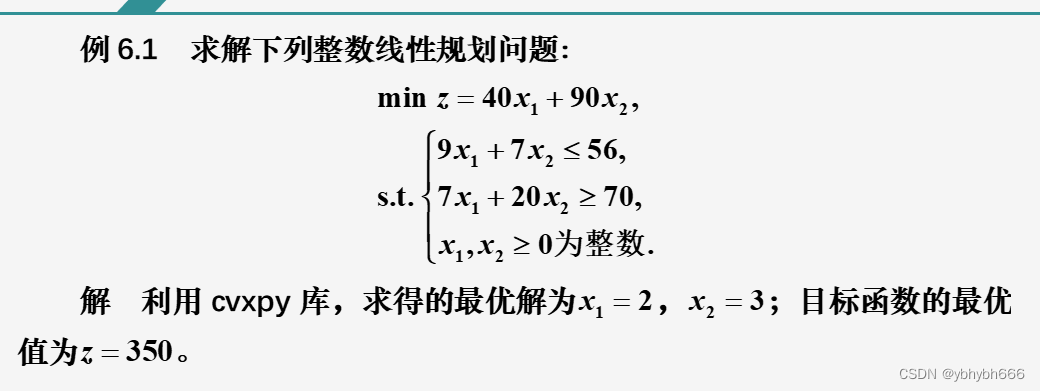

In [4]:
import cvxpy as cp
from numpy import array
c=array([40,90])  #定义目标向量
a=array([[9,7],[-7,-20]])  #定义约束矩阵
b=array([56,-70])  #定义约束条件的右边向量
x=cp.Variable(2,integer=True)  #定义两个整数决策变量
obj=cp.Minimize(c*x)  #构造目标函数
cons=[a*x<=b, x>=0]    #构造约束条件
prob=cp.Problem(obj, cons)  #构建问题模型
prob.solve(solver='GUROBI',verbose =True)  #求解问题
print("最优值为:",prob.value)
print("最优解为：\n",x.value)


                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) Sep 15 02:44:56 PM: Your problem has 2 variables, 2 constraints, and 0 parameters.
(CVXPY) Sep 15 02:44:56 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Sep 15 02:44:56 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Sep 15 02:44:56 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Sep 15 02:44:56 PM: Compiling problem (target solver=GUROBI).
(CVXPY) Sep 15 02:44:56 PM: Reduction chain: CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffin

e:\anaconda\lib\site-packages\cvxpy\expressions\expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)
e:\anaconda\lib\site-packages\cvxpy\expressions\expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 2 times so far.

  warnings.warn(msg, UserWarning)


In [5]:
cp.installed_solvers()

['ECOS', 'ECOS_BB', 'GUROBI', 'OSQP', 'SCIPY', 'SCS']

集装箱问题的求解：

这是美国大学生数学建模竞赛1988年B题。题中所有包装箱共重89t，而两辆平板车一共只能载重80t，因此不可能全装下。究竟在两辆车上各装哪些种类箱子且各为多少才合适，必须有评价的标准。这标准就是遵守题中说明的重量、厚度、件数等方面的约束条件，尽可能地多装，而尽可能多装有两种理解：一是尽可能在体积上多装，由于规定是按面包片重叠那样的装法，故等价于尽可能使两辆车上的装箱总厚度尽可能大；二是尽可能在重量上多装，即使得两辆车上的装箱总重量尽可能大。

In [6]:
import cvxpy as cp
import numpy as np
L=np.array([48.7,52.0,61.3,72.0,48.7,52.0,64.0])	
w=np.array([2000,3000,1000,500,4000,2000,1000])
a=np.array([8,7,9,6,6,4,8])
x=cp.Variable((2,7), integer=True)
obj=cp.Maximize(cp.sum(x*L))
con=[cp.sum(x,axis=0,keepdims=True)<=a.reshape(1,7),
	 x*L<=1020, x*w<=40000, cp.sum(x[:,4:]*L[4:])<=302.7, x>=0]
prob = cp.Problem(obj, con)
prob.solve(solver='GUROBI',verbose =True)
print("最优值为:",prob.value)
print("最优解为：\n",x.value)


                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) Sep 15 02:51:42 PM: Your problem has 14 variables, 5 constraints, and 0 parameters.
(CVXPY) Sep 15 02:51:42 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Sep 15 02:51:42 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Sep 15 02:51:42 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Sep 15 02:51:42 PM: Compiling problem (target solver=GUROBI).
(CVXPY) Sep 15 02:51:42 PM: Reduction chain: FlipObjective -> CvxAttr2Constr -> Qp2SymbolicQp 

Coefficient statistics:
  Matrix range     [1e+00, 4e+03]
  Objective range  [5e+01, 7e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+00, 4e+04]

No start values specified in MIP start

Found heuristic solution: objective -1932.100000
Presolve removed 15 rows and 0 columns
Presolve time: 0.00s
Presolved: 11 rows, 14 columns, 46 nonzeros
Variable types: 0 continuous, 14 integer (0 binary)
Found heuristic solution: objective -1938.700000

Root relaxation: objective -2.040000e+03, 6 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 -2040.0000    0    2 -1938.7000 -2040.0000  5.23%     -    0s
H    0     0                    -2030.000000 -2040.0000  0.49%     -    0s
H    0     0                    -2033.300000 -2040.0000  0.33%     -    0s
H    0     0                    -2039.400000 -2040.0000  0.03%     -    0s
     

e:\anaconda\lib\site-packages\cvxpy\expressions\expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 3 times so far.

  warnings.warn(msg, UserWarning)
e:\anaconda\lib\site-packages\cvxpy\expressions\expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 4 times so far.

  warnings.warn(msg, UserWarning)
e:\anaconda\lib\site-packages\cvxpy\expression


Cutting planes:
  Gomory: 1
  MIR: 5
  StrongCG: 2

Explored 1844 nodes (4939 simplex iterations) in 0.28 seconds (0.01 work units)
Thread count was 12 (of 12 available processors)

Solution count 5: -2039.4 -2033.3 -2030 ... -1932.1
No other solutions better than -2039.4

Optimal solution found (tolerance 1.00e-04)
Best objective -2.039400000000e+03, best bound -2.039400000000e+03, gap 0.0000%
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Sep 15 02:51:42 PM: Problem status: optimal
(CVXPY) Sep 15 02:51:42 PM: Optimal value: 2.039e+03
(CVXPY) Sep 15 02:51:42 PM: Compilation took 2.009e-02 seconds
(CVXPY) Sep 15 02:51:42 PM: Solver (including time spent in interface) took 3.052e-01 seconds
最优值为: 2039.4
最优解为：
 [[0. 7. 9. 0. 0. 2. 0.]
 [8. 0. 0. 6. 3. 1. 0.]]


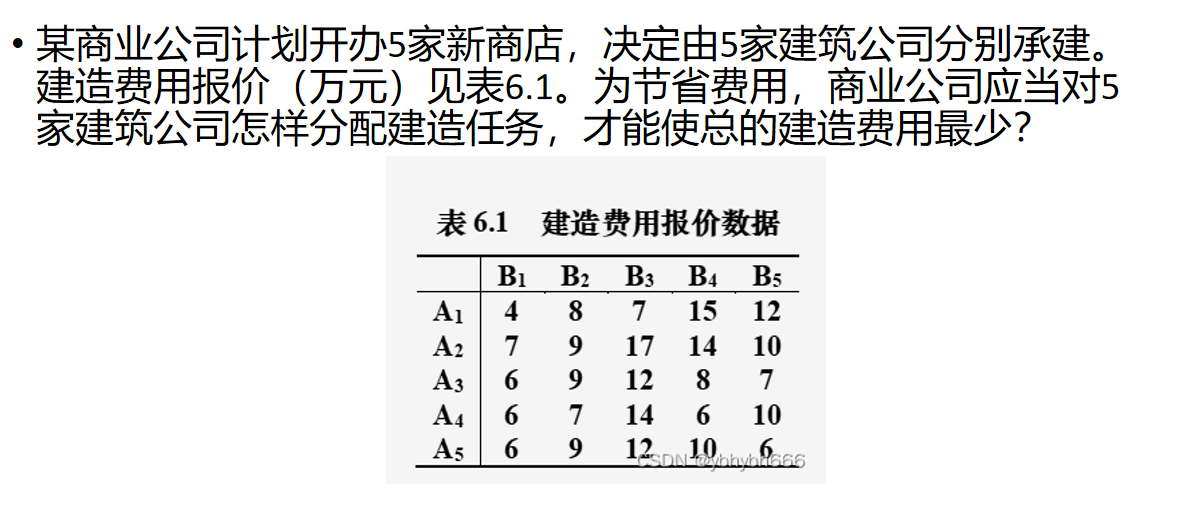
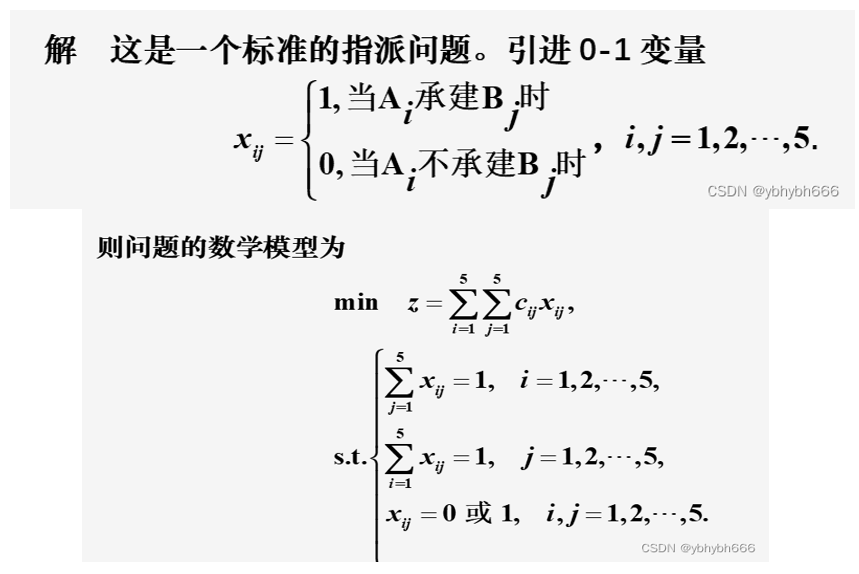

In [7]:
import cvxpy as cp
import numpy as np
c=np.array([[4, 8, 7, 15, 12],
         	[7, 9, 17, 14, 10],
	        [6, 9, 12, 8, 7],
   	     	[6, 7, 14, 6, 10],
        	[6, 9, 12, 10, 6]])
x = cp.Variable((5,5),integer=True)
obj = cp.Minimize(cp.sum(cp.multiply(c,x)))
con= [0 <= x, x <= 1, cp.sum(x, axis=0, keepdims=True)==1,
             cp.sum(x, axis=1, keepdims=True)==1]
prob = cp.Problem(obj, con)
prob.solve(solver='GUROBI')
print("最优值为:",prob.value)
print("最优解为：\n",x.value)


最优值为: 34.0
最优解为：
 [[ 0. -0.  1. -0. -0.]
 [ 0.  1. -0. -0. -0.]
 [ 1. -0. -0. -0.  0.]
 [-0.  0. -0.  1. -0.]
 [-0. -0. -0. -0.  1.]]
